In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df = pd.read_csv("C:\\Users\\rajla\\OneDrive\\Documents\\car_price_dataset.csv")


In [6]:
#dispaly th data
df.head(10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [7]:
df.shape

(10000, 10)

In [9]:
df.info

<bound method DataFrame.info of            Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3    

In [10]:
#dividing the data in to numerical and categorical data
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns

In [11]:
print(numerical_cols)

Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price'], dtype='object')


In [12]:
print(numerical_cols)

Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price'], dtype='object')


In [13]:
print(categorical_cols)

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object')


In [14]:
#finding null value
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

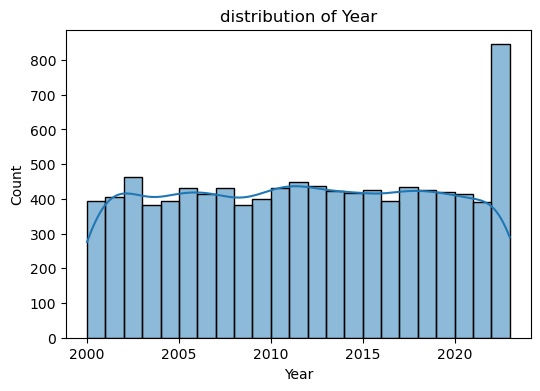

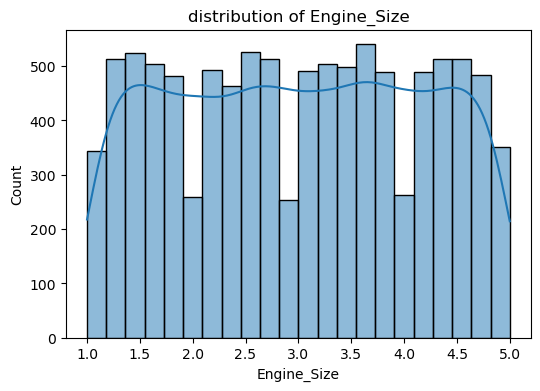

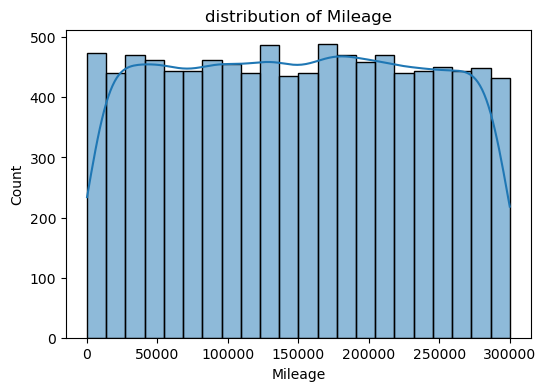

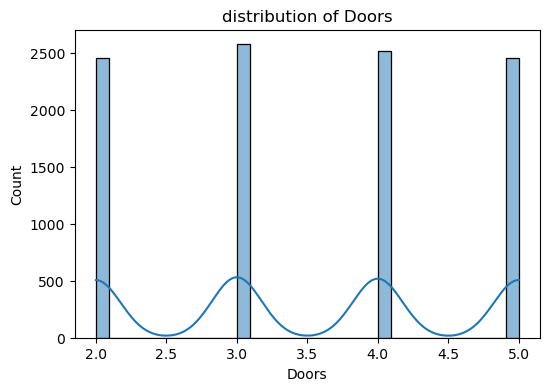

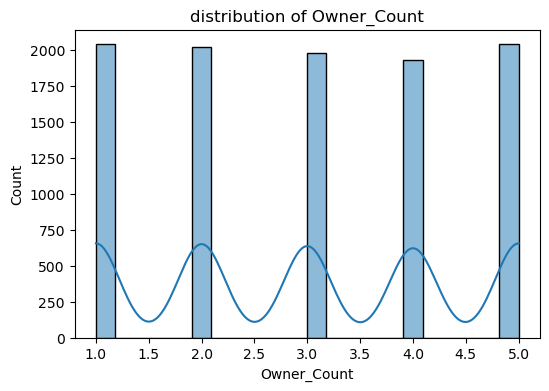

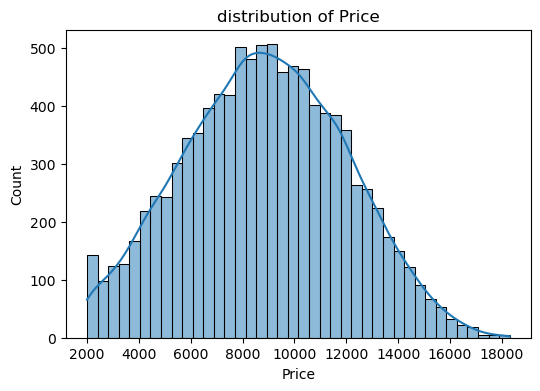

In [15]:
#Univarient analysis of numerical_cols
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'distribution of {col}')
    plt.show()

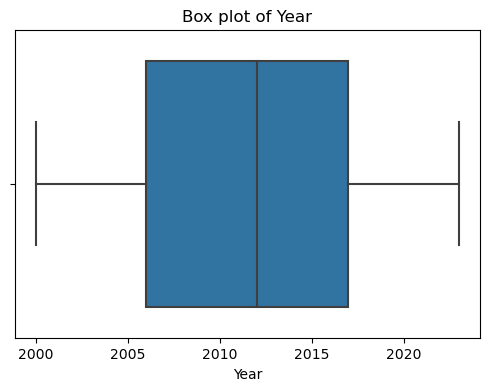

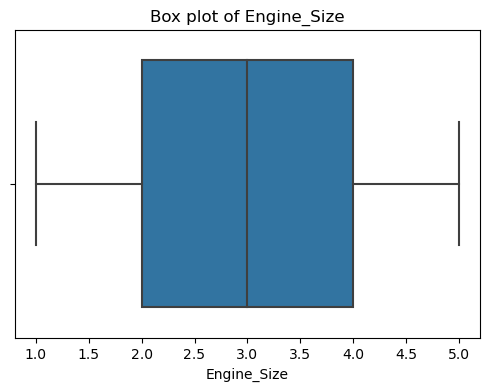

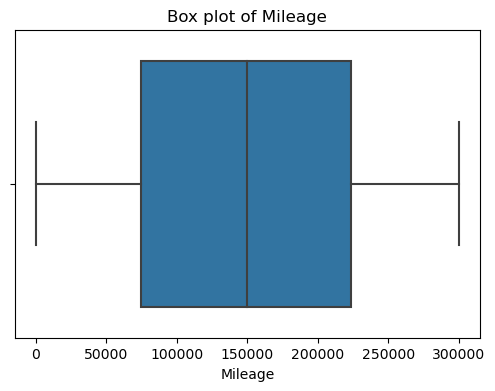

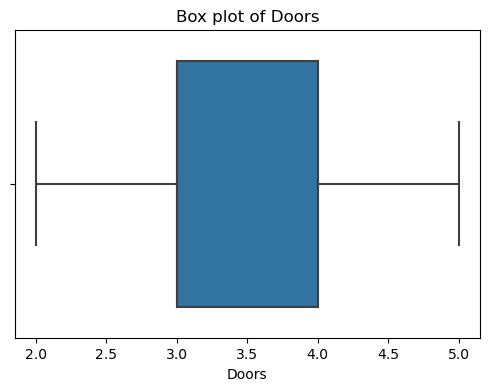

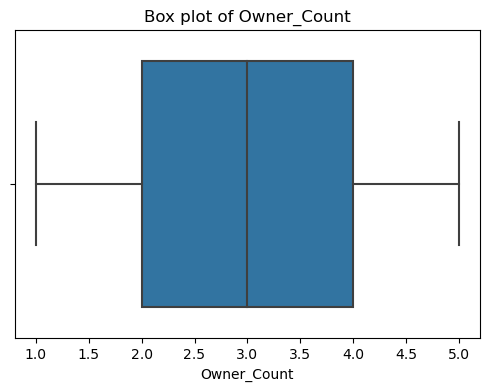

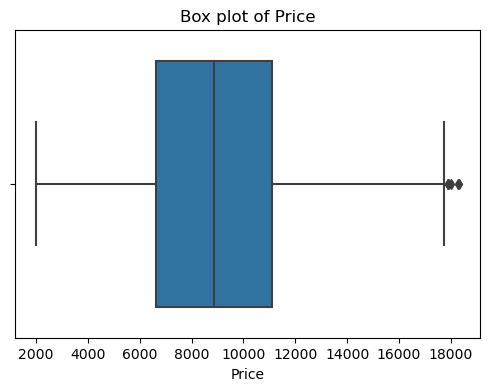

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [17]:
df[categorical_cols].nunique()

Brand           10
Model           30
Fuel_Type        4
Transmission     3
dtype: int64

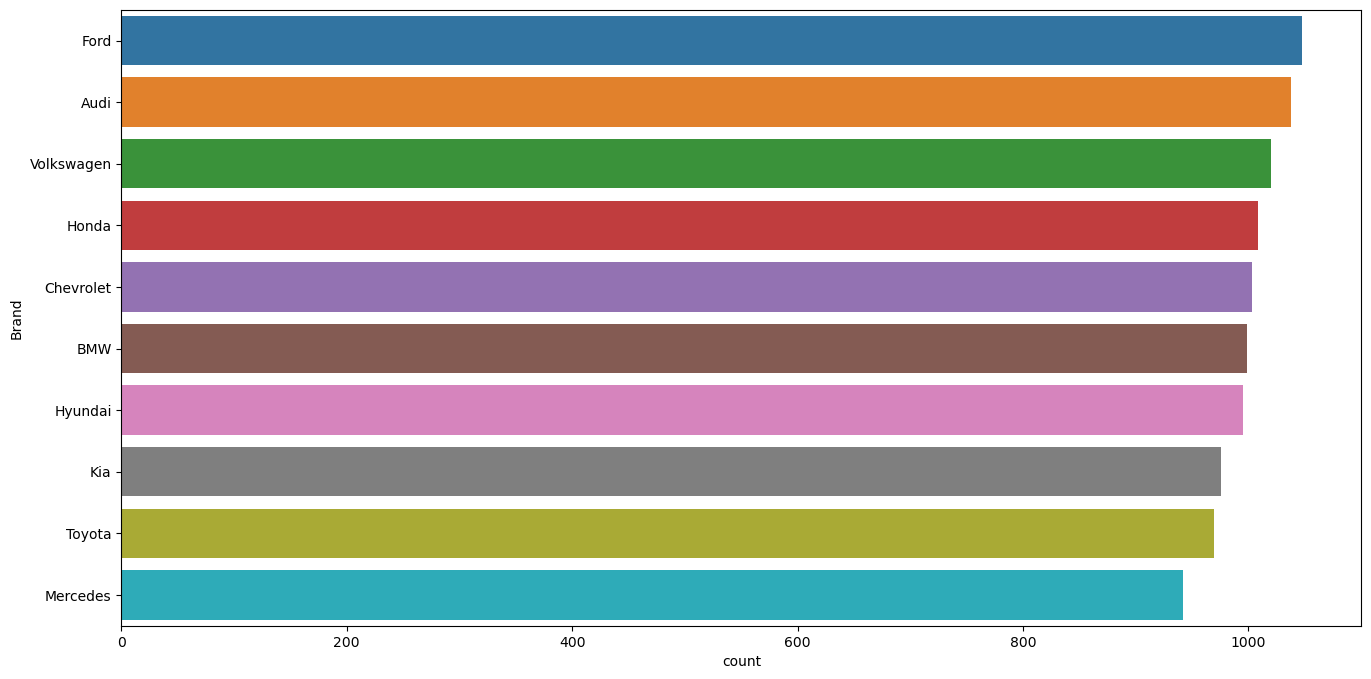

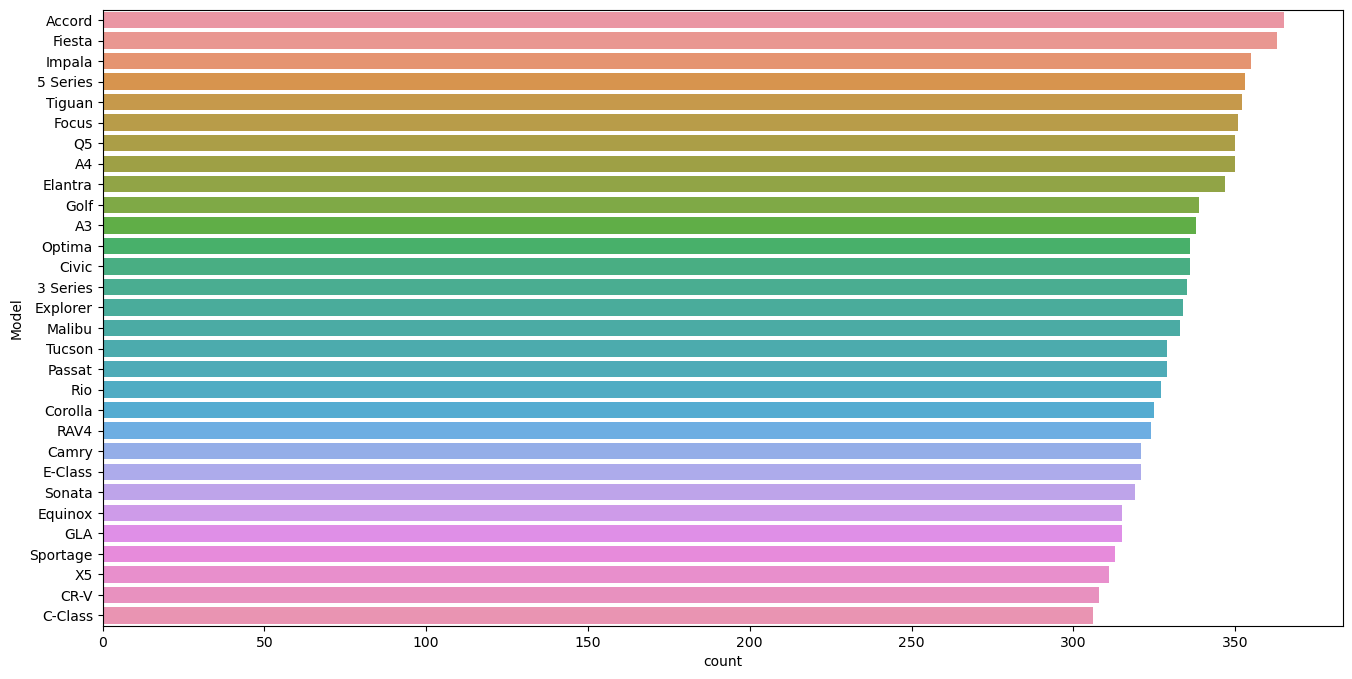

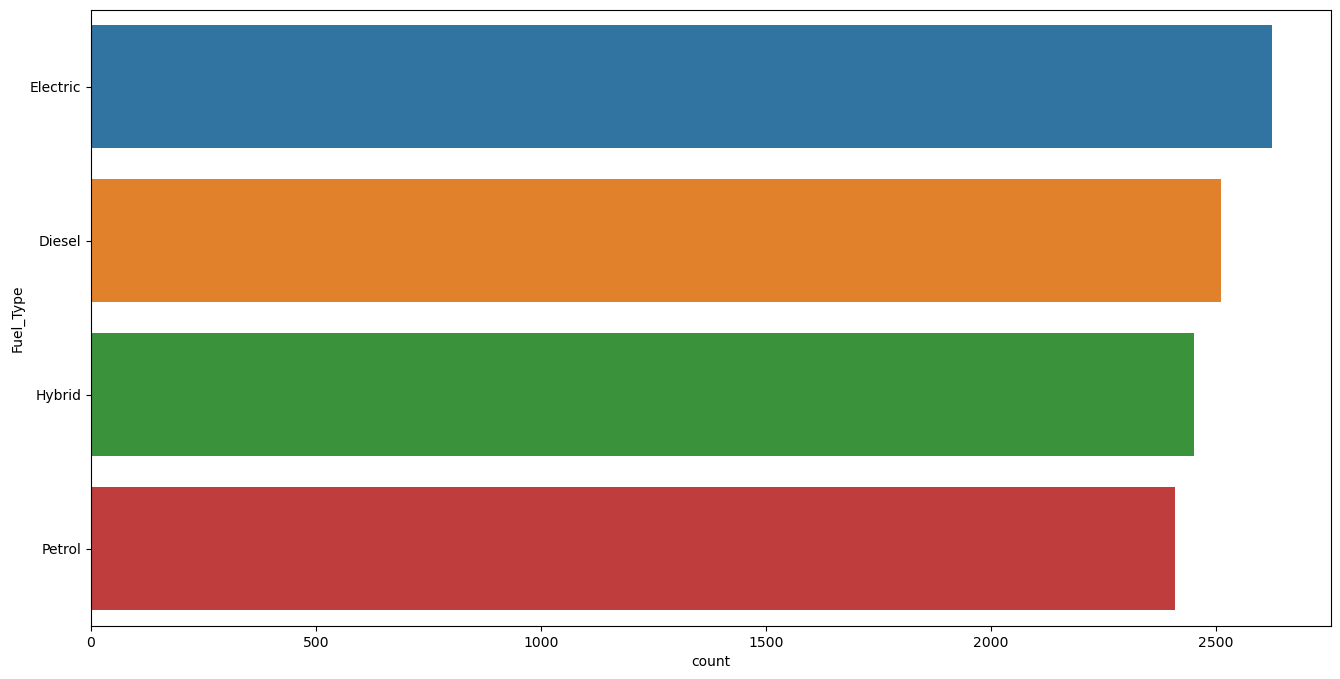

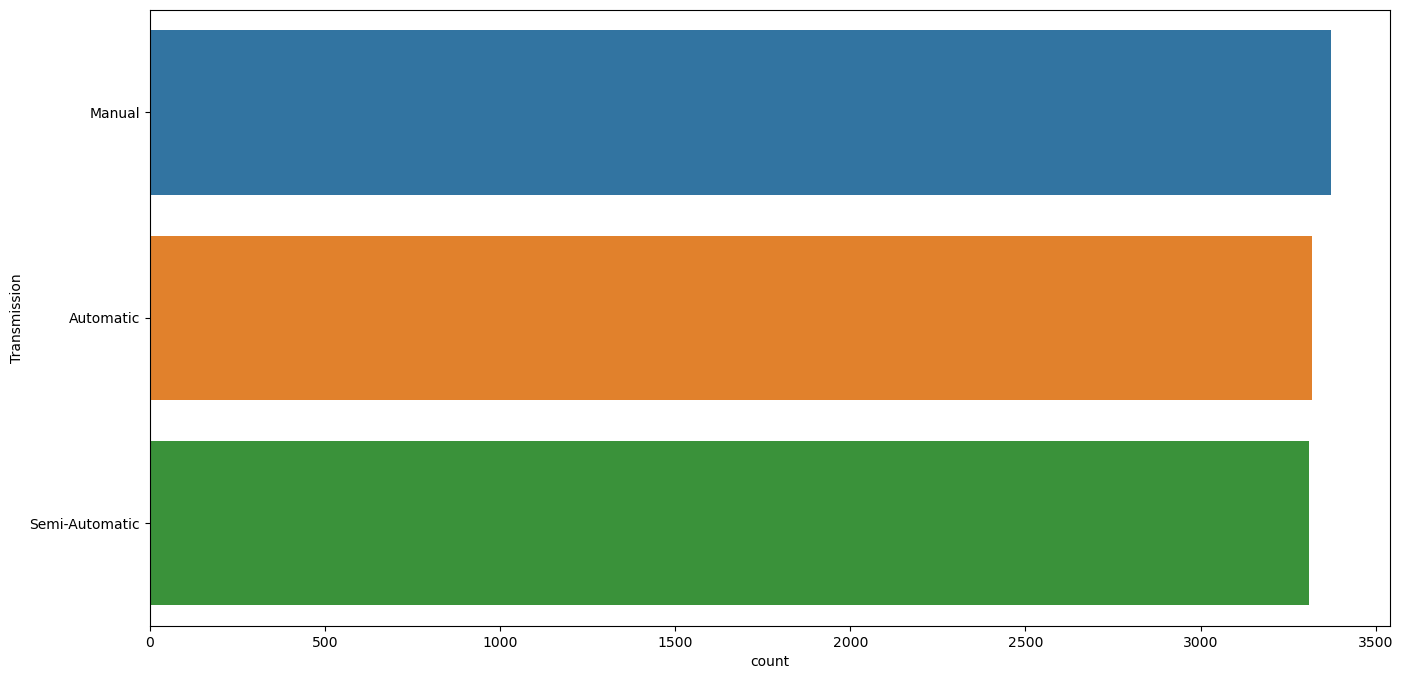

In [18]:
#univarient analysis for categorical datasets 
for col in categorical_cols:
    plt.figure(figsize=(16,8))
    sns.countplot(y=df[col],order=df[col].value_counts().index)
    plt.show()

In [21]:
#bivarient analysis for numerical-categorical data
categorical_cols = ['Brand', 'Fuel_Type']  # Example categorical columns

# Crosstab between two categorical variables
contingency_table = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]])
print(contingency_table)


Fuel_Type   Diesel  Electric  Hybrid  Petrol
Brand                                       
Audi           248       262     280     248
BMW            245       279     217     258
Chevrolet      260       250     257     236
Ford           264       278     258     248
Honda          248       265     256     240
Hyundai        250       255     253     237
Kia            260       244     242     230
Mercedes       251       249     216     226
Toyota         246       268     224     232
Volkswagen     240       275     250     255


<Axes: xlabel='Price', ylabel='Brand'>

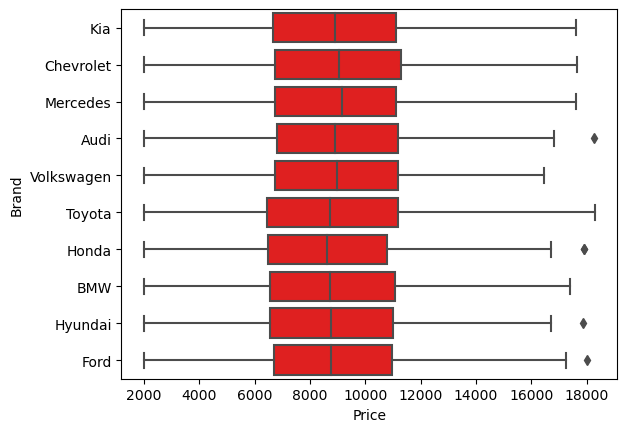

In [22]:
sns.boxplot(data=df, y="Brand", x="Price",color='red')

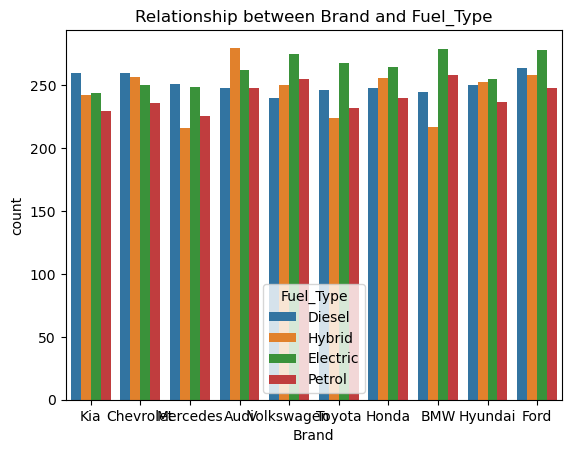

In [23]:
sns.countplot(x=categorical_cols[0], hue=categorical_cols[1], data=df)
plt.title(f'Relationship between {categorical_cols[0]} and {categorical_cols[1]}')
plt.show()

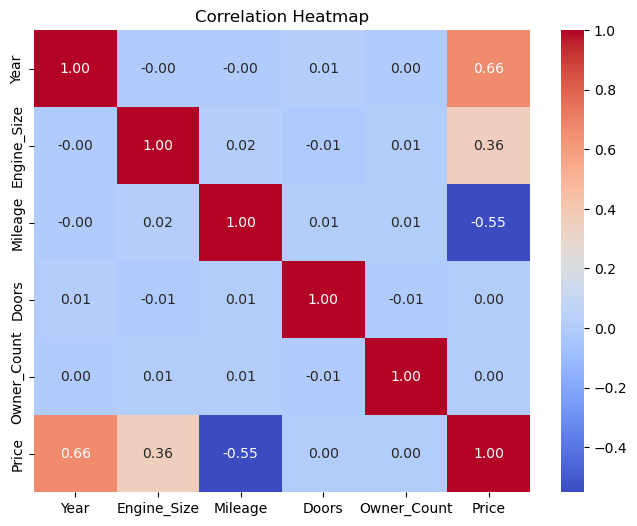

In [24]:
#bivarient analysis for categorical-categorical  dataset
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
#bivarient analysis for categorical-categorical data
from scipy.stats import chi2_contingency
# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

# Interpretation:
if p < 0.05:
    print("The variables are dependent (statistically significant relationship).")
else:
    print("The variables are independent (no significant relationship).")

Chi-Square Statistic: 18.474770457797174
P-value: 0.8883399086462952
The variables are independent (no significant relationship).


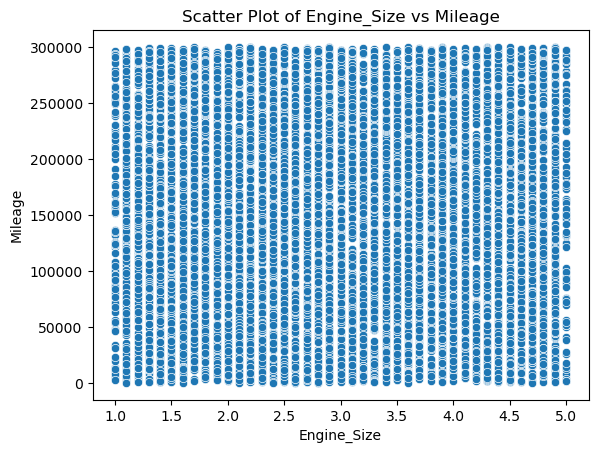

In [30]:
#bivarient analysis of numerical-numerical data
numerical_cols = ['Engine_Size', 'Mileage']  # Replace with your actual numerical columns

# Scatter plot
sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
plt.title(f'Scatter Plot of {numerical_cols[0]} vs {numerical_cols[1]}')
plt.show()

In [31]:
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

             Engine_Size   Mileage
Engine_Size     1.000000  0.015135
Mileage         0.015135  1.000000


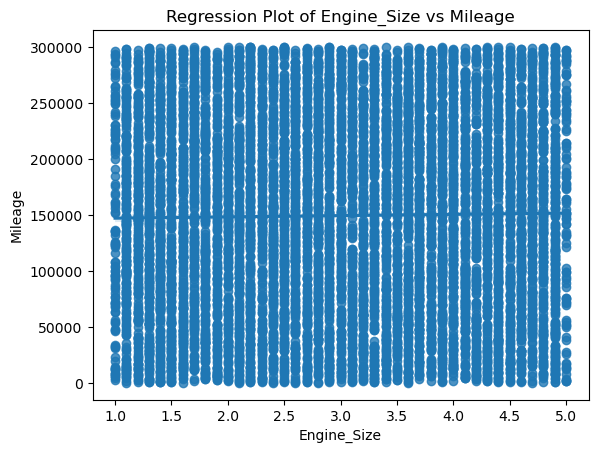

In [32]:
sns.regplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
plt.title(f'Regression Plot of {numerical_cols[0]} vs {numerical_cols[1]}')
plt.show()

In [33]:
#calculating for outlier
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df)
print(Q1)
print(Q3)
print(IQR)

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356

In [34]:
df.to_csv('cleaned_dataset.csv',index=False)
